In [1]:
import pickle

In [2]:
x_poison = pickle.load(open('x_poison.sav', 'rb'))
y_poison = pickle.load(open('y_poison.sav', 'rb'))

In [3]:
x_poison.head()

loan_amnt  annual_inc       dti  delinq_2yrs  inq_last_6mths  pub_rec  \
0    0.617527    0.076650  0.319744         0.00        0.183657    0.000   
6    0.840441    0.083221  0.934623         0.05        0.000000    0.002   
7    0.601370    0.076575  0.918743         0.00        0.000000    0.000   
8    0.042075    0.038691  0.262630         0.00        0.000000    0.000   
20   0.532681    0.002827  0.261607         0.00        0.143597    0.000   

    open_acc  pub_rec_1  revol_bal  revol_util  ...  emp_length  \
0   0.053429        0.0   0.007540    0.023138  ...    0.929040   
6   0.197972        0.0   0.006988    0.011173  ...    0.992583   
7   0.049780        0.0   0.005827    0.061177  ...    0.323375   
8   0.025325        0.0   0.003398    0.093639  ...    1.000000   
20  0.193205        0.0   0.000176    0.190190  ...    1.000000   

    earliest_cr_line  mths_since_last_delinq  mths_since_last_record  \
0           1.096762                0.391101                     1.0   
6           1.065370                0.304383                     1.0   
7           0.354150                1.000000                     1.0   
8           0.766989                0.182065                     1.0   
20          0.713406                0.021816                     1.0   

    mths_since_last_major_derog  term_36months  addr_state  purpose  \
0                      1.000000            0.0        11.0     13.0   
6                      1.000000            1.0        38.0      1.0   
7                      1.000000            0.0        35.0      5.0   
8                      1.000000            1.0         6.0      1.0   
20                     0.061118            1.0        12.0     13.0   

    home_ownership  verification_status  
0              4.0                  1.0  
6              4.0                  1.0  
7              4.0                  1.0  
8              2.0                  1.0  
20             2.0                  1.0  

[5 rows x 23 columns]

In [4]:
y_poison.head()

0
0  0.7
1 -0.2
2 -0.2
3 -0.2
4  0.7

In [5]:
print(x_poison.shape, y_poison.shape)

(20500, 23) (20500, 1)


In [6]:
x_clean = pickle.load(open('X_preprocessed.sav', 'rb'))
y_clean = pickle.load(open('Y_preprocessed.sav', 'rb'))

In [7]:
print(x_clean.shape, y_clean.shape)

(168048, 23) (168048, 1)


In [8]:
import pandas as pd

In [9]:
df_chunks = []

In [10]:
i = 0
for _ in range(80):
    if i+200 < len(x_poison):
        df_chunks.append(x_poison.iloc[i:i + 200, :])
    else:
        df_chunks.append(x_poison.iloc[i:, :])
    i = i + 200

In [11]:
count = 0
for chunk in df_chunks:
    count += 1
    #print(chunk)
print(count)

80


In [12]:
y_chunks = []
i = 0
for _ in range(80):
    if i+200 < len(y_poison):
        y_chunks.append(y_poison.iloc[i:i + 200, :])
    else:
        y_chunks.append(y_poison.iloc[i:, :])
    i = i + 200

In [13]:
count = 0
for chunk in y_chunks:
    count += 1
    #print(chunk)
print(count)

80


In [14]:
filename = 'original_model.sav'
clean_model = pickle.load(open(filename, 'rb'))

In [15]:
x_clean = pickle.load(open('X_preprocessed.sav', 'rb'))
y_clean = pickle.load(open('Y_preprocessed.sav', 'rb'))

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
print(x_clean.shape, y_clean.shape)

(168048, 23) (168048, 1)


In [19]:
x_new = x_clean
y_new = y_clean

In [20]:
rmse_array = []

In [21]:
for _ in range(10):

    least_error_df = pd.DataFrame()
    min_error = 10000000
    least_error_index = 10000000
    
    for index, chunk in enumerate(df_chunks):
        #print("At index:", index)
        y_pred = clean_model.predict(chunk)
        rmse = mean_squared_error(y_chunks[index], y_pred)
        #print("rmse of current chunk: ", rmse)
        if(rmse < min_error):
            min_error = rmse
            least_error_df = chunk
            least_error_index = index
            #print("Min error is now: ", min_error)

    
    least_error_df = pd.DataFrame(least_error_df.iloc[:,:].values)    
    x_new = x_new.append(least_error_df)
    y_new = y_new.append(y_chunks[least_error_index])

    del df_chunks[least_error_index]
    del y_chunks[least_error_index]
    
    print(x_new.shape, y_new.shape)

    X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state=0)
    regressor = LinearRegression()  
    LIR=regressor.fit(X_train, y_train) 
    y_clean_pred = LIR.predict(x_clean)

    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y_clean, y_clean_pred)
    rmse_array.append(rmse)
    print(rmse)


(168248, 23) (168248, 1)
0.02129953939708445
(168448, 23) (168448, 1)
0.021329619465029856
(168648, 23) (168648, 1)
0.021325791502491045
(168848, 23) (168848, 1)
0.021363350528474385
(169048, 23) (169048, 1)
0.02133689858428416
(169248, 23) (169248, 1)
0.021382845557228556
(169448, 23) (169448, 1)
0.02139275177242303
(169648, 23) (169648, 1)
0.02140509071220795
(169848, 23) (169848, 1)
0.021404768614365
(170048, 23) (170048, 1)
0.02141601468239398


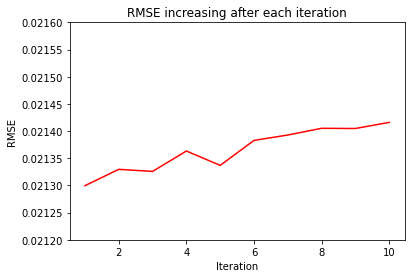

In [31]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# data to be plotted 
x = [1,2,3,4,5,6,7,8,9,10]
y = rmse_array
  
# plotting 
plt.title("RMSE increasing after each iteration")  
plt.xlabel("Iteration")  
plt.ylabel("RMSE")  
plt.ylim([0.0212, 0.0216])
plt.plot(x, y, color ="red")  
plt.show()

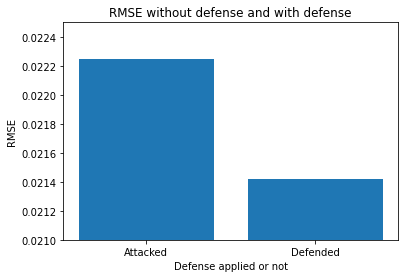

In [24]:
rmse_poisoned = pickle.load(open('rmse_poison.sav', 'rb'))
rmse_defended = rmse_array[-1]

x = ['Attacked', 'Defended']
y = [rmse_poisoned, rmse_defended]
  
# plotting 
plt.title("RMSE without defense and with defense")  
plt.xlabel("Defense applied or not")  
plt.ylabel("RMSE")  
plt.ylim([0.021, 0.0225])
plt.bar(x, y)  
plt.show()

In [25]:
print(x_new.shape, y_new.shape)

(170048, 23) (170048, 1)


In [26]:
print(len(df_chunks), len(y_chunks))

70 70


In [27]:
rmse_clean = pickle.load(open('rmse_clean.sav', 'rb'))

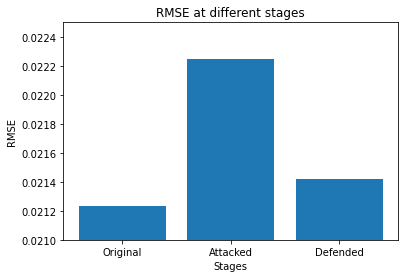

In [28]:
x = ['Original', 'Attacked', 'Defended']
y = [rmse_clean, rmse_poisoned, rmse_defended]
  
# plotting 
plt.title("RMSE at different stages")  
plt.xlabel("Stages")  
plt.ylabel("RMSE")  
plt.ylim([0.021, 0.0225])
plt.bar(x, y)  
plt.show()